<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         

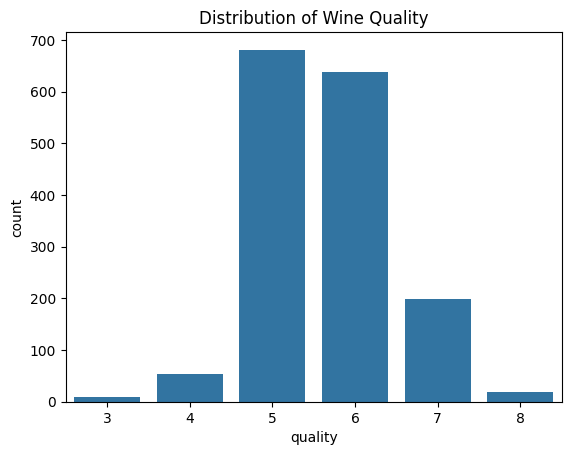

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

# Step 1: Exploratory Data Analysis (EDA)
# Load the dataset
df = pd.read_csv("redwine.csv")

# Display general information about the dataset
print(df.info())

# First 5 rows of the dataset
print(df.head())

# Display descriptive statistics
print(df.describe())

# Visualize the distribution of quality scores
sns.countplot(x='quality', data=df)
plt.title('Distribution of Wine Quality')
plt.show()


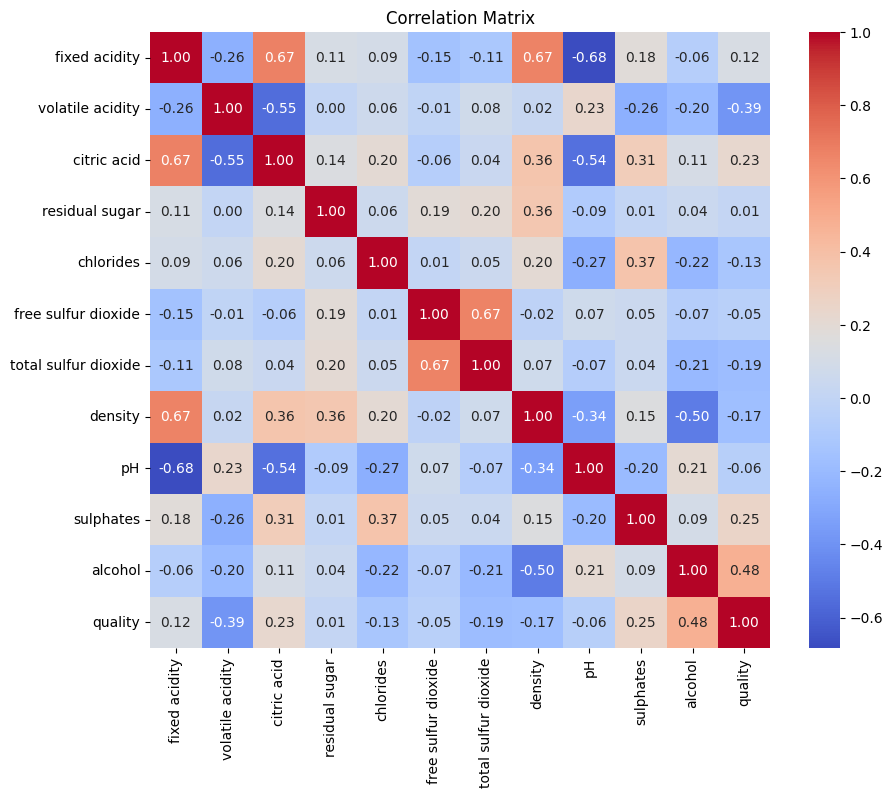

In [13]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [11]:
# Step 2: Data Preprocessing
# Check for missing values
print(df.isnull().sum())


# Split features (X) and target variable (y)
X = df.drop('quality', axis=1)
y = df['quality']


# Normalize features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode the target variable (quality) using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [15]:
from sklearn.preprocessing import LabelBinarizer

# Initialize LabelBinarizer
label_binarizer = LabelBinarizer()

# Binarize the target variable (quality)
y_binarized = label_binarizer.fit_transform(df['quality'])

# Split the dataset into features (X) and the binary target variable (y)
X = df.drop(['quality'], axis=1)
y = y_binarized

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a classifier (e.g., Random Forest)
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.725


In [ ]:
# Step 3: Model Selection
# Initialize classifiers
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the classifiers to the training data
rf_classifier.fit(X_train, y_train)

# Perform cross-validation to evaluate model performance
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5)
print("Cross Validation Scores:", cv_scores)
print("Mean Cross Validation Score:", cv_scores.mean())

# Step 4: Hyperparameter Optimization
# Define hyperparameters for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Get the best model
best_rf_classifier = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Cross Validation Scores: [0.66015625 0.67578125 0.63671875 0.6640625  0.75294118]
Mean Cross Validation Score: 0.6779319852941177
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Score: 0.6927849264705882
Test Accuracy: 0.65625
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        10
           2       0.71      0.74      0.72       130
           3       0.62      0.70      0.66       132
           4       0.66      0.50      0.57        42
           5       0.00      0.00      0.00         5

    accuracy                           0.66       320
   macro avg       0.33      0.32      0.32       320
weighted avg       0.63      0.66      0.64       320



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
# Define a threshold to classify wines as good or bad quality
threshold = 6  # Threshold can be changed based on criteria

# Convert quality scores to binary labels: 0 for bad quality (<= threshold) and 1 for good quality (> threshold)
df['quality_label'] = df['quality'].apply(lambda x: 1 if x > threshold else 0)

# Split the dataset into features (X) and the binary target variable (y)
X = df.drop(['quality', 'quality_label'], axis=1)
y = df['quality_label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a classifier (e.g., Random Forest)
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9
